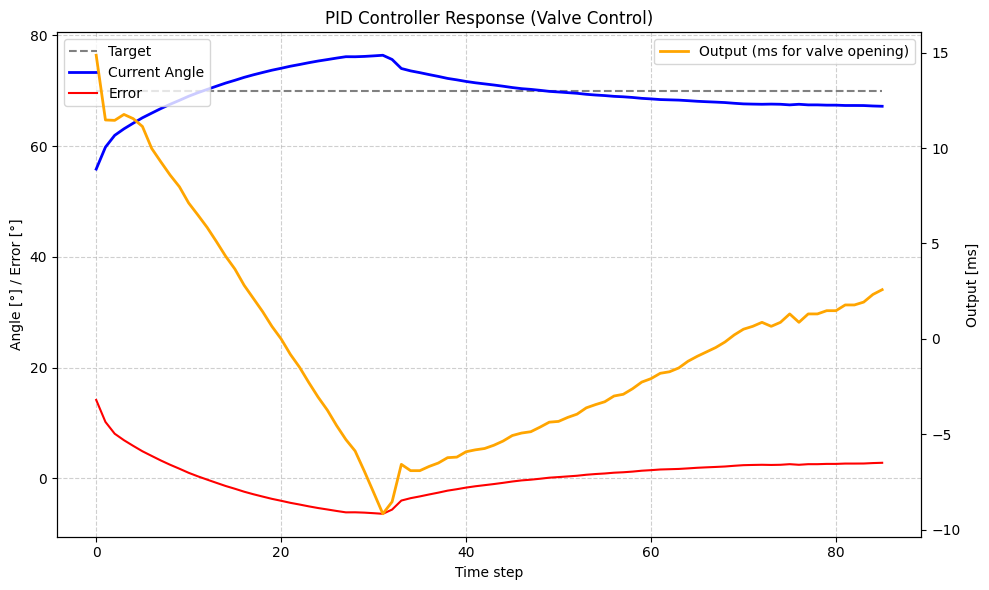

In [6]:
import matplotlib.pyplot as plt

with open("pid-tests/transformed-data/pid-test-1.txt", "r") as f:
    lines = [line.strip() for line in f if line.strip() and not line.startswith("#")]

# Parse values from dataset
targets, angles, errors, outputs = [], [], [], []
for line in lines:
    parts = line.split(";")
    if len(parts) == 4:
        t, a, e, o = map(float, parts)
        targets.append(t)
        angles.append(a)
        errors.append(e)
        outputs.append(o)

time = list(range(len(targets)))

fig, ax1 = plt.subplots(figsize=(10, 6))

# Left Y axis (Target, Angle, Error)
ax1.plot(time, targets, '--', label='Target', color='gray', linewidth=1.5)
ax1.plot(time, angles, label='Current Angle', color='blue', linewidth=2)
ax1.plot(time, errors, label='Error', color='red', linewidth=1.5)
ax1.set_xlabel('Time step')
ax1.set_ylabel('Angle [°] / Error [°]')
ax1.legend(loc='upper left')
ax1.grid(True, linestyle='--', alpha=0.6)

# Right Y axis (Output)
ax2 = ax1.twinx()
ax2.plot(time, outputs, label='Output (ms for valve opening)', color='orange', linewidth=2)
ax2.set_ylabel('Output [ms]')
ax2.legend(loc='upper right')

plt.title('PID Controller Response (Valve Control)')
plt.tight_layout()
plt.show()